In [1]:
from scipy import io
from numpy.linalg import norm
import numpy as np
from __future__ import print_function

def load_data_noPreprocessing_MS2(lay1Len,lay2Len,lay3Len,lay4Len):
    m = io.loadmat("T.mat")

    y = []
    X = []

    
    #print(m['T'][0][1])
    #print("row",m['T'][0][1][0][0][0][0][0])
    #print("element",m['T'][0][1][0][0][1][0][0])
    #print("inodes",m['T'][0][1][0][0][2])
    #print(m['T'])
    layers = [[],[],[],[],[]]
    
    #set up the layer combos
    for i in range(lay1Len):
        layers[0].append([1000])
    for i in range(lay2Len):
        layers[1].append([2000])
    for i in range(lay3Len):
        layers[2].append([3000])
    for i in range(lay4Len):
        layers[3].append([4000])
    for i in range(300):
        layers[4].append([5000])
    
    #print(m['T'])
    #print("PARSING:")
    #for i in range(len(m['T'][0])):
    #    print(i, "\t", m['T'][0][i][0][0][0][0][0])
    
    
    for i in range(len(m['T'][0])):
        theseInodes = m['T'][0][i][0][0][2]
        position = m['T'][0][i][0][0][1][0][0]
        thisLayer = m['T'][0][i][0][0][0][0][0]
        newInodes = []
        for j in range(len(theseInodes)):
            newInodes.append(theseInodes[j][0])
        #print(i, newInodes)
        #
        #append the inodes to the layers matrix.
        
        #print(len(layers[1]),position-1)
        layers[thisLayer-1][position-1] = newInodes
        
        #if (i < 4): layers[0].append(newInodes)
        #elif (i < 8): layers[1].append(newInodes)
        #elif (i < 19): layers[2].append(newInodes)
        #elif (i < 31): layers[3].append(newInodes)
        #else: layers[4].append(newInodes)
        """
        if (i < 4): layers[0].append(newInodes)
        elif (i < 10): layers[1].append(newInodes)
        elif (i < 21): layers[2].append(newInodes)
        elif (i < 71): layers[3].append(newInodes)
        else: layers[4].append(newInodes)"""
    #print("LAYER 1\n",layers[0])
    #print("LAYER 2\n",layers[1])
    #print("LAYER 3\n",layers[2])
    #print("LAYER 4\n",layers[3])
    #print("LAYER 5\n",layers[4])
    
    
    #print(len(layers[0]),len(layers[1]),len(layers[2]),len(layers[3]),len(layers[4]))
    return layers
    
layers = load_data_noPreprocessing_MS2(4,6,11,50)   
#layers = load_data_noPreprocessing_MS2(4,4,11,12)  

allPaths = []
counter = 1
def getChildren(path,index,currentLayer,layers):
    
    #If the current layer is 4, return all of the possible paths.
    ##print(index,":",len(layers[currentLayer]),end=", ",sep="")
    if (index>= len(layers[currentLayer])): return
    #print("Data: ",path,"nodes:",layers[currentLayer][index],currentLayer)
    inodes = layers[currentLayer][index]
    #print("Info:",path,index,currentLayer,inodes)
    
    if currentLayer == 4  and max(inodes) < 500:
        paths = []
        for i in range(len(inodes)):
            thisPath = path[:]
            thisPath.append(inodes[i])
            
            allPaths.append(thisPath)
            print("\t\t\t\tPATH",thisPath)
    #otherwise, continue to the next layer:
    else:
        if currentLayer == 0 and max(inodes) < 500:
            print("firstlayer:",index+1,inodes)
        if currentLayer == 1 and max(inodes) < 500:
            print("\tsecondlayer:",index+1,inodes)
        if currentLayer == 2 and max(inodes) < 500:
            print("\t\tthirdlayer:",index+1,inodes)
        if currentLayer == 3 and max(inodes) < 500:
            print("\t\t\tfourthlayer:",index+1,inodes)
        for i in range(len(inodes)):
            if inodes[i] < 500:
                newPath = path[:]
                newPath.append(inodes[i])
                getChildren(newPath,inodes[i]-1,currentLayer +1,layers)
 
print("\n\n")
getChildren([1],0,0,layers)
print("---------------")
getChildren([2],1,0,layers)
print("---------------")
getChildren([3],2,0,layers)
print("---------------")
getChildren([4],3,0,layers)
#print(len(allPaths))
for i in range(len(allPaths)):
    print("Path",i,allPaths[i])
#4,4,11,12,57

0 [1, 2, 3, 4, 5, 6]
1 [1, 2, 3, 4, 5, 6]
2 [1, 2, 3, 4, 5, 6]
3 [1, 2, 3, 4, 5, 6]
4 [2, 6, 10, 11]
5 [1, 4, 11]
6 [2, 3, 6, 9]
7 [3, 5]
8 [16, 19, 45]
9 [11, 25, 39, 42]
10 [3, 6, 23, 24, 25, 32, 47]
11 [3, 49]
12 [5, 8, 22, 40, 45, 48, 49]
13 [3, 8, 28, 30, 37, 40, 44]
14 [11, 31, 35, 49, 50]
15 [23, 25, 32]
16 [8, 34, 36, 42, 50]
17 [2, 3, 10, 19, 20, 29, 31, 34]
18 [8, 30, 38, 50]
19 [56, 95]
20 [6, 54]
21 [41, 49]
22 [56, 58]
23 [20, 39]
24 [84, 86]
25 [42, 57, 88]
26 [48, 63]
27 [4, 14]
28 [21, 41, 50, 82]
29 [38, 45, 68]
30 [45, 69]
31 [153, 163, 191]
32 [46, 163]
33 [6, 53]
34 [17, 19, 63]
35 [11, 32, 74, 133, 157]
36 [7, 145]
37 [74, 106, 166]
38 [67, 145]
39 [27, 36, 140]
40 [94, 174, 177]
41 [48, 64, 150]
42 [68, 107, 118]
43 [15, 139, 172]
44 [71, 100, 103, 132, 166]
45 [20, 66, 173]
46 [64, 149]
47 [24, 159]
48 [19, 80]
49 [97, 98, 179]
50 [8, 13, 112]
51 [83, 84, 121, 150]
52 [66, 188]
53 [111, 147]
54 [10, 59, 188]
55 [28, 61, 159]
56 [64, 102, 121]
57 [61, 96, 100, 133

			fourthlayer: 3 [56, 95]
				PATH [3, 4, 6, 3, 56, 26]
				PATH [3, 4, 6, 3, 56, 102]
				PATH [3, 4, 6, 3, 95, 68]
				PATH [3, 4, 6, 3, 95, 130]
				PATH [3, 4, 6, 3, 95, 141]
			fourthlayer: 8 [6, 54]
				PATH [3, 4, 6, 8, 54, 22]
				PATH [3, 4, 6, 8, 54, 46]
				PATH [3, 4, 6, 8, 54, 59]
				PATH [3, 4, 6, 8, 54, 82]
			fourthlayer: 28 [84, 86]
				PATH [3, 4, 6, 28, 84, 115]
				PATH [3, 4, 6, 28, 84, 175]
				PATH [3, 4, 6, 28, 86, 102]
				PATH [3, 4, 6, 28, 86, 106]
		thirdlayer: 9 [8, 34, 36, 42, 50]
			fourthlayer: 8 [6, 54]
				PATH [3, 4, 9, 8, 54, 22]
				PATH [3, 4, 9, 8, 54, 46]
				PATH [3, 4, 9, 8, 54, 59]
				PATH [3, 4, 9, 8, 54, 82]
			fourthlayer: 36 [48, 63]
			fourthlayer: 50 [45, 69]
	secondlayer: 5 [3, 5]
		thirdlayer: 3 [3, 6, 23, 24, 25, 32, 47]
			fourthlayer: 3 [56, 95]
				PATH [3, 5, 3, 3, 56, 26]
				PATH [3, 5, 3, 3, 56, 102]
				PATH [3, 5, 3, 3, 95, 68]
				PATH [3, 5, 3, 3, 95, 130]
				PATH [3, 5, 3, 3, 95, 141]
			fourthlayer: 24 [20, 39]
				PA

In [ ]:
from ete3 import Tree, TreeStyle
t = Tree()
#t = Tree( "((a,b),c);" )
t = Tree( "(((22,46,59,82),(22,46,59,82)),4);" )
#t.populate(10)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.show(tree_style=ts)

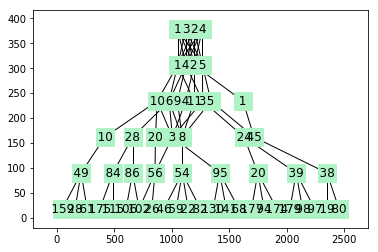

In [2]:
-